# **Task 3**

### **Importing necessary libraries**

In [107]:
import pickle
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler
from prettytable import PrettyTable
import matplotlib.pyplot as plt

### **Loading of data**

In [108]:
pickle_file = 'data.pickle'
dict_pickle_data = pickle.load(open(pickle_file, 'rb'))

### **Training and test data**

In [109]:
train_data = dict_pickle_data['train']
train_data = np.array(train_data)
np.random.shuffle(train_data)
train_data = np.array_split(train_data, 15)
test_data = dict_pickle_data['test']

x_test = test_data[:, 0]
y_test = test_data[:, 1]

### **Calculating Bias and Variance**

In [110]:
final_bias = []
final_var = []
final_mse = []

for degree in range(1,11):
    predictions=[]
    for i in range(15):
        x_train_subset = train_data[i][:, 0]
        y_train_subset = train_data[i][:, 1]
        
        scaler = StandardScaler()
        x_train_scaled = scaler.fit_transform(x_train_subset.reshape(-1, 1))
        x_test_scaled = scaler.transform(x_test.reshape(-1, 1))

        transformer = PolynomialFeatures(degree)
        x_train_poly = transformer.fit_transform(x_train_scaled)
        x_test_poly = transformer.transform(x_test_scaled)

        model = LinearRegression().fit(x_train_poly, y_train_subset)
        y_pred = model.predict(x_test_poly)
        predictions.append(y_pred)
    
    predictions = np.array(predictions)
    mean = np.mean(predictions, axis=0)
    
    bias_square = np.mean((np.mean(predictions, axis=0) - y_test) ** 2)
    
    variance = np.mean(((predictions - mean) ** 2), axis=0)
    variance = np.mean(variance)
 
    mse = np.mean((predictions - y_test) ** 2, axis=0)
    mse = (np.mean(mse))

    final_bias.append(bias_square)
    final_var.append(variance)
    final_mse.append(mse)

### **Table representation**

In [111]:
table = PrettyTable()
table.field_names = ["Degree", "Bias^2", "Variance", "MSE"]
for i in range(10):
    table.add_row([i+1, final_bias[i], final_var[i], final_mse[i]])

print(table)

+--------+--------------------+---------------------+--------------------+
| Degree |       Bias^2       |       Variance      |        MSE         |
+--------+--------------------+---------------------+--------------------+
|   1    | 2.570102304761517  | 0.12711997936803715 | 2.6972222841295532 |
|   2    | 2.5342105640130264 | 0.17872400251216458 | 2.712934566525192  |
|   3    | 1.9838734775828044 | 0.24040516296519382 | 2.2242786405479977 |
|   4    | 1.7195002337257264 | 0.33133913940552484 | 2.0508393731312515 |
|   5    | 1.6158032796303412 | 0.41703423788903693 | 2.032837517519378  |
|   6    | 1.6230126285341655 |  0.5628469472368598 | 2.185859575771027  |
|   7    | 1.649755209489068  |  0.8641045283797137 | 2.5138597378687817 |
|   8    | 1.6589555561192117 |  1.128236768083396  | 2.787192324202607  |
|   9    | 1.6279268007718322 |  2.555342093778318  | 4.183268894550151  |
|   10   | 2.336196783723067  |  8.266773774170144  | 10.602970557893212 |
+--------+---------------

# **Task 4**

### **Calculating Irreducible Error**

In [112]:

final_irr_err = []
final_irr_err_rounded = []

for i in range(1, 11):
    irreducible_error = final_mse[i - 1] - final_var[i - 1] - final_bias[i - 1]
    final_irr_err.append(irreducible_error)
    final_irr_err_rounded.append(round(irreducible_error))
    
table = PrettyTable()
table.field_names = ["Degree", "Bias^2", "Variance", "MSE", "Irreducible error", "Irreducible error-rounded off"]
for i in range(10):
    table.add_row([i+1, final_bias[i], final_var[i], final_mse[i], final_irr_err[i], final_irr_err_rounded[i]])

print(table)

+--------+--------------------+---------------------+--------------------+------------------------+-------------------------------+
| Degree |       Bias^2       |       Variance      |        MSE         |   Irreducible error    | Irreducible error-rounded off |
+--------+--------------------+---------------------+--------------------+------------------------+-------------------------------+
|   1    | 2.570102304761517  | 0.12711997936803715 | 2.6972222841295532 | -8.881784197001252e-16 |               0               |
|   2    | 2.5342105640130264 | 0.17872400251216458 | 2.712934566525192  | 8.881784197001252e-16  |               0               |
|   3    | 1.9838734775828044 | 0.24040516296519382 | 2.2242786405479977 | -4.440892098500626e-16 |               0               |
|   4    | 1.7195002337257264 | 0.33133913940552484 | 2.0508393731312515 | 4.440892098500626e-16  |               0               |
|   5    | 1.6158032796303412 | 0.41703423788903693 | 2.032837517519378  | -

# **Task 5**

### **Plotting Bias2 - Variance Graph**

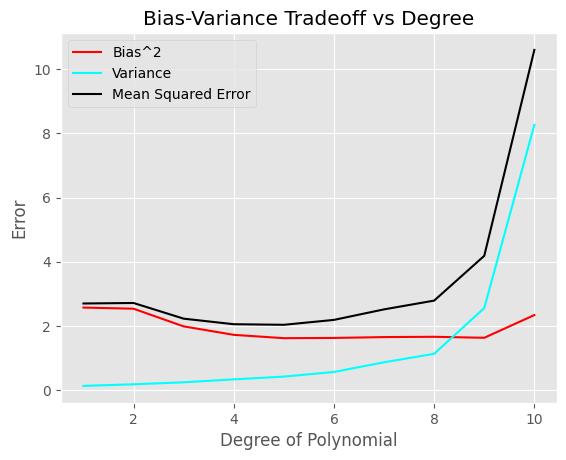

In [113]:
plt.plot(range(1,11), final_bias, label='Bias^2' , color='red')
plt.plot(range(1,11), final_var, label='Variance' , color='cyan')
plt.plot(range(1,11), final_mse, label='Mean Squared Error' , color='black')
plt.title("Bias-Variance Tradeoff vs Degree")
plt.xlabel('Degree of Polynomial')
plt.ylabel('Error')
plt.legend()
plt.show()

# **Task 6**

### **Importing necessary libraries**

In [114]:
import pickle
import numpy as np
from sklearn import preprocessing
from sklearn.linear_model import Ridge, Lasso, LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error

### **Function to split data into X and Y**

In [115]:
def get_XY(data):
    X = np.array([point[0] for point in data]).reshape(-1, 1)
    Y = np.array([point[1] for point in data]).reshape(-1, 1)
    return X, Y

### **Load Data**

In [116]:
with open("data.pickle", "rb") as dataset:
    data = pickle.load(dataset)
    train_data = data['train']
    test_data = data['test']

### **Split data into X and Y**

In [117]:
X_train, Y_train = get_XY(train_data)
X_test, Y_test = get_XY(test_data)

### **(a) Polynomial Regression without regularization**

In [118]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

poly = PolynomialFeatures(degree=10)
X_train_poly = poly.fit_transform(X_train_scaled)
X_test_poly = poly.transform(X_test_scaled)

model = LinearRegression()
model.fit(X_train_poly, Y_train)
y_pred = model.predict(X_test_poly)
mse_poly = mean_squared_error(Y_test, y_pred)
print("MSE (Polynomial Regression - No Regularization):", mse_poly)

MSE (Polynomial Regression - No Regularization): 1.6267138653031261


### **(b) Regularized Regression using Ridge**

In [152]:
ridge_model = Ridge(alpha=0.09,max_iter=10000)
ridge_model.fit(X_train_poly, Y_train)
y_pred_ridge = ridge_model.predict(X_test_poly)
mse_ridge = mean_squared_error(Y_test, y_pred_ridge)
print("MSE (Ridge Regression with Polynomial Features):", mse_ridge)

MSE (Ridge Regression with Polynomial Features): 1.6264580240274935


### **(c) Regularized Regression using Lasso**

In [153]:
lasso_model = Lasso(alpha=0.05, max_iter=10000)
lasso_model.fit(X_train_poly, Y_train)
y_pred_lasso = lasso_model.predict(X_test_poly)
mse_lasso = mean_squared_error(Y_test, y_pred_lasso)
print("MSE (Lasso Regression with Polynomial Features):", mse_lasso)

MSE (Lasso Regression with Polynomial Features): 1.6265747236117343


### **(d) Comparison and Discussion**


Comparison of MSE values:
Polynomial Regression MSE: 1.6267138653031261
Ridge Regression MSE: 1.6264580240274935
Lasso Regression MSE: 1.6265747236117343


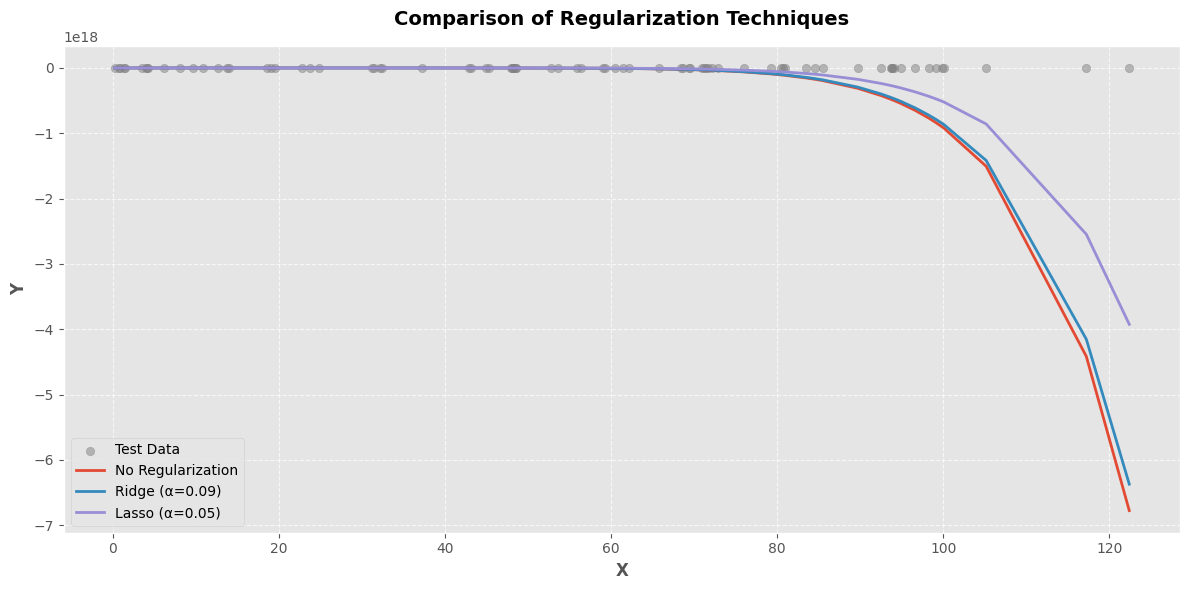

In [154]:
print("\nComparison of MSE values:")
print(f"Polynomial Regression MSE: {mse_poly}")
print(f"Ridge Regression MSE: {mse_ridge}")
print(f"Lasso Regression MSE: {mse_lasso}")

ridge_alpha = 0.09
lasso_alpha = 0.05

plt.style.use('ggplot')
plt.figure(figsize=(12, 6))

plt.scatter(X_test, Y_test, color='gray', alpha=0.5, label='Test Data')

X_plot = np.sort(X_test, axis=0)
X_plot_poly = poly.transform(X_plot)

plt.plot(X_plot, model.predict(X_plot_poly), 
         label='No Regularization', linewidth=2)
plt.plot(X_plot, ridge_model.predict(X_plot_poly), 
         label=f'Ridge (α={ridge_alpha})', linewidth=2)
plt.plot(X_plot, lasso_model.predict(X_plot_poly), 
         label=f'Lasso (α={lasso_alpha})', linewidth=2)

plt.xlabel('X', fontsize=12, fontweight='bold')
plt.ylabel('Y', fontsize=12, fontweight='bold')
plt.title('Comparison of Regularization Techniques', 
          fontsize=14, fontweight='bold', pad=15)
plt.legend()
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()
